### Project Introduction:
This is a ML project presented by Brandi Booth.  Mobile phone carrier Megaline, wants to impliment a ML model to recommend their newer phone plans  to customers.  They can recommend either the Smart plan or the Ultra plan.  This ML model will solve a binary classification problem. (As to which plan to recommend to the customer Ultra; which will be classified as 1. Or Smart; which will be classified as 0).  <br><br>
I will access behavior data about subscribers who have already switched to the new plans from the provided dataframe. 
For this classification task, I will develop a model that will pick the right plan. I will go straight to creating the model as preprocessing has been completed as described by the project.  I will follow evaluation steps and provide a model with a threshold for accuracy is 0.75 & Check the accuracy using the test dataset.
For this we ask, can we predict whether a customer will choose the Smart plan or the Ultra plan based on our feature details?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn import tree

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
smart_var = df.loc[df['is_ultra'] == 0].count()['is_ultra']
ultra_var = df.loc[df['is_ultra'] == 1].count()['is_ultra']

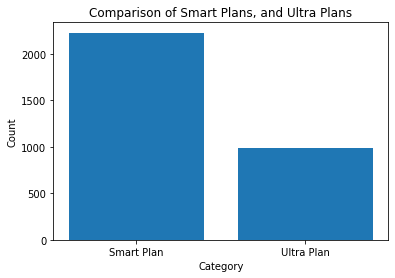

In [5]:
# Create a bar plot
categories = ['Smart Plan', 'Ultra Plan']
values = [smart_var, ultra_var]

plt.bar(categories, values)

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Smart Plans, and Ultra Plans')

# Show the plot
plt.show()

In [6]:
display(smart_var)
ultra_var

2229

985

<AxesSubplot:>

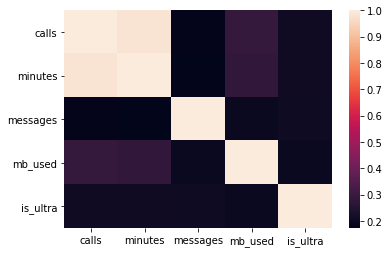

In [7]:
sns.heatmap(df.corr())

In [8]:
# Splitting the data into features (X) and target (y)
X_features = df.drop('is_ultra', axis=1)
y_target = df['is_ultra']

In [9]:

# Splitting the data into training and temporary sets
train_X, temp_X, train_y, temp_y = train_test_split(X_features, y_target, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and test sets
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)

# Printing the sizes of each set
print("Training set size:", len(train_X))
print("Validation set size:", len(valid_X))
print("Test set size:", len(test_X))


Training set size: 1928
Validation set size: 643
Test set size: 643


In [10]:
 print(train_X.shape, train_y.shape) 

(1928, 4) (1928,)


In [11]:
model = LogisticRegression()

#train the model
model.fit(train_X, train_y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
score_train = model.score(train_X, train_y)
# calculate accuracy score on training set
 
score_valid = model.score(valid_X, valid_y)
# calculate accuracy score on validation set
 

print(
    "Accuracy of the logistic regression model on the training set:",
    score_train,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    score_valid,
)
score_test = model.score(test_X, test_y)
print("Accuracy of the logistic regression model on the test set:", score_test)

#final model of LogisticRegression
model_test_final = LogisticRegression() 
model_test_final.fit(test_X, test_y)
score = model.score(test_X, test_y)
print('Final Model Score on LogisticRegression:', score)

Accuracy of the logistic regression model on the training set: 0.7432572614107884
Accuracy of the logistic regression model on the validation set: 0.7402799377916018
Accuracy of the logistic regression model on the test set: 0.7682737169517885
Final Model Score on LogisticRegression: 0.7682737169517885


The Accuracy for predictions using LogisticRegression model for the binary classification of plan choice for the mobile phone company is 76.8%, which is higher than the would be 'by chance' rate of 50%.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
best_score = 0
best_est = 0
for est in range(1,11): # choose hyperparameter range
    model2 = RandomForestClassifier(random_state=42, n_estimators=est) # set number of trees
    model2.fit(train_X, train_y) # train model on training set
    score = model2.score(valid_X, valid_y) # calculate accuracy score on validation set
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

score_train = model2.score(train_X, train_y)
# calculate accuracy score on training set
 
score_valid = model2.score(valid_X, valid_y)
# calculate accuracy score on validation set

print(
    "Accuracy of the RandomForestClassifier model on the training set:",
    score_train,
)
print(
    "Accuracy of the RandomForestClassifier model on the validation set:",
    score_valid,
)

score_test = model2.score(test_X, test_y)
print("Accuracy of the RandomForestClassifier on the test set:", score_test)

#final model of RandomForestClassifier
model2_test_final = RandomForestClassifier(random_state=42, n_estimators=4) 
model2_test_final.fit(test_X, test_y)
score2 = model2.score(test_X, test_y)
print('Final Model Score on RandomForestClassifier:', score2)

Accuracy of the best model on the validation set (n_estimators = 4): 0.7916018662519441
Accuracy of the RandomForestClassifier model on the training set: 0.9802904564315352
Accuracy of the RandomForestClassifier model on the validation set: 0.7869362363919129
Accuracy of the RandomForestClassifier on the test set: 0.8164852255054432
Final Model Score on RandomForestClassifier: 0.8164852255054432


The accuracy of the best model on the test set (n_estimators = 4): 62% for the RandomForestClassifier model, which is failing score and not much above by chance percentage.  Hyperparameters chosen are a random_state and n_estimators (which iterates through a range of options). 


<br><b>Instantiate the model to be used (DecisionTreeClassifier)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Build Model of DecisionTreeClassifier
best_mod = None
best_result = 0
for depth in range(1, 11):
	model3 = DecisionTreeClassifier(random_state=42, max_depth=depth) # create a model with the given depth
	model3.fit(train_X, train_y) # train the model
	predictions_valid = model3.predict(valid_X) # get the model's predictions
	result = accuracy_score(valid_y, predictions_valid) # calculate the accuracy
	if result > best_result:
		best_mod = model3
		best_result = result

print(f'Accuracy of the best model max_depth={depth}: {best_result}')

score_train3 = model3.score(train_X, train_y)
# calculate accuracy score on training set
 
score_valid3 = model3.score(valid_X, valid_y)
# calculate accuracy score on validation set

print(
    "Accuracy of the DecisionTreeClassifier model on the training set:",
    score_train3,
)
print(
    "Accuracy of the DecisionTreeClassifier model on the validation set:",
    score_valid3,
)

score_test3 = model3.score(test_X, test_y)
print("Accuracy of the DecisionTreeClassifier on the test set:", score_test)

#Final model of DecisionTreeClassifier
model3_test_final = DecisionTreeClassifier(random_state=42, max_depth=10)
model3_test_final.fit(test_X, test_y)
score3 = model3.score(test_X, test_y)
print('Final Model Score of on DecisionTreeClassifier:', score3)


Accuracy of the best model max_depth=10: 0.7962674961119751
Accuracy of the DecisionTreeClassifier model on the training set: 0.8786307053941909
Accuracy of the DecisionTreeClassifier model on the validation set: 0.7947122861586314
Accuracy of the DecisionTreeClassifier on the test set: 0.8164852255054432
Final Model Score of on DecisionTreeClassifier: 0.7947122861586314


The Accuracy for predictions using DecisionTreeClassifier model for the binary classification of plan choice for the mobile phone company is 81.2%.

<br><b>
Final Model

In [17]:
#final model of RandomForestClassifier
model2_test_final = RandomForestClassifier(random_state=42, n_estimators=4) 
model2_test_final.fit(test_X, test_y)
score2 = model2.score(test_X, test_y)
print('Final Model with RandomForestClassifier:', score2)

Final Model with RandomForestClassifier: 0.8164852255054432


<div class=>
 Conclusion <br>
    2 of the training datasets accuracy scored higher than the test set.  Which shows overfitting in the models. 
As we can see RandomForestClassifier has the highest accuracy percentage of 81%.  Which is above 75% threshold and far above the 50% chance rate if our data was balanced, and more than 75% chance rate if data mostly chose toward skewed data.  I used hyper parameters `random_state` and `n_estimators`.  Random_state keeps the material shuffled in the same pattern for no variation, but allows the learning model to not "memorize" the details.  I iterated over a range of n_estimators; so that the model may choose it's best.<br>
I tried 3 Classification models; and found RandomForestClassifier provided the best results. 
</div>
